# SPDA SUMMATIVE ASSESSMENT QUESTION 2


## Webscrapping Using Reddit API


The data was gotten from the Reddit website, under the r\health session.

The data consist of all the trending health topics being dicussed on the forum - r\health from 10/2/2024 - 11/15/2024.

This data is important to know the current health trends as it realtes to citizen joournalism. This data can inform writers and journalists on the key topics people are interested to know more about.

The variables of interst includes -  'title'- which represents the trending topics, 'num_comments' - the total comments per topic, 'score - ',, 'author - the initiator of the topica which in this case includes news oulets like nbc news, ctvnews etc'

Praw was installed using "pip install praw" to enable scrapping from the Reddit website. Praw is a Python wrapper for the Reddit API, which makes authentication and JSON parsing easy.

In [19]:
import praw

#Authentication
reddit = praw.Reddit(
    client_id="5Wv14SUqGs8ETZ8inzjcMg",
    client_secret="0zUUYuMLM2vBe2-XVIExAqochF5gQQ",
    user_agent="windows:my_app:1.0 (by /u/Life_Hat1137)",
    username="Life_Hat1137",  # Your Reddit username
    password="Ola07061193131"  # Your Reddit password
)

print("Authenticated as:", reddit.user.me())


Authenticated as: Life_Hat1137


#### Step 2 - Perform data preparation/cleaning

In [147]:
import praw
import pandas as pd
import arrow

#Submission data
health_submissions = []

#Submissions r/health
for submission in reddit.subreddit('health').hot(limit=500):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    d['author'] = submission.author.name if submission.author else None
    d['subreddit'] = submission.subreddit.display_name
    
    # Convert created_utc to clear date WITH arrow
    d['date'] = arrow.get(submission.created_utc).format('YYYY-MM-DD')
    
    health_submissions.append(d)

In [151]:
df = pd.DataFrame(health_submissions)

print(df.head())

df.to_csv('health_reddit_data_with_dates_arrow.csv', index=False)

        id                                              title  num_comments  \
0  1gs5t18  RFK Jr.’s to-do list to make America ‘healthy’...           156   
1  1gs9t9i  CDC confirms Oregon’s first human case of bird...            25   
2  1gsgbez  Prospect of RFK Jr. as head of HHS panics many...             4   
3  1gsmvym  Vaccine shows promise against aggressive breas...             1   
4  1gs4vxx  Cases of highly infectious and preventable mea...             3   

   score  upvote_ratio              domain  gilded  num_crossposts   nsfw  \
0    461          0.92             cnn.com       0               0  False   
1    194          0.97         nbcnews.com       0               0  False   
2     41          0.87         science.org       0               0  False   
3      6          1.00  medicine.washu.edu       0               0  False   
4    143          0.98   independent.co.uk       0               0  False   

                 author subreddit        date  
0             

In [25]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 418
Number of columns: 12


In [19]:
health_reddit = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

In [21]:
health_reddit

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
0,1gs5t18,RFK Jr.’s to-do list to make America ‘healthy’...,156,461,0.92,cnn.com,0,0,False,cnn,Health,2024-11-15
1,1gs9t9i,CDC confirms Oregon’s first human case of bird...,25,194,0.97,nbcnews.com,0,0,False,nbcnews,Health,2024-11-15
2,1gsgbez,Prospect of RFK Jr. as head of HHS panics many...,4,41,0.87,science.org,0,0,False,Exastiken,Health,2024-11-16
3,1gsmvym,Vaccine shows promise against aggressive breas...,1,6,1.00,medicine.washu.edu,0,0,False,F0urLeafCl0ver,Health,2024-11-16
4,1gs4vxx,Cases of highly infectious and preventable mea...,3,143,0.98,independent.co.uk,0,0,False,theindependentonline,Health,2024-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1fve31i,Ontario child dies from rabies after bat found...,234,1251,0.98,globalnews.ca,0,0,False,globalnewsca,Health,2024-10-03
414,1fw4ho0,WHO approves first mpox diagnostic test,0,13,0.88,dw.com,0,0,False,DoremusJessup,Health,2024-10-04
415,1fvkopg,Hospitals take steps to conserve IV fluid supp...,4,98,0.99,nbcnews.com,0,0,False,nbcnews,Health,2024-10-03
416,1fviry2,"Flu vaccine might be less effective this year,...",4,99,0.95,cbsnews.com,0,0,False,CBSnews,Health,2024-10-03


In [61]:
health_reddit.columns

Index(['id', 'title', 'num_comments', 'score', 'upvote_ratio', 'domain',
       'gilded', 'num_crossposts', 'nsfw', 'author', 'subreddit', 'date'],
      dtype='object')

In [31]:
schema_fname = 'health_reddit_data_with_dates_arrow.csv'
schema_raw = pd.read_csv(schema_fname, index_col='author').title

In [34]:
schema_raw

author
cnn                     RFK Jr.’s to-do list to make America ‘healthy’...
nbcnews                 CDC confirms Oregon’s first human case of bird...
Exastiken               Prospect of RFK Jr. as head of HHS panics many...
F0urLeafCl0ver          Vaccine shows promise against aggressive breas...
theindependentonline    Cases of highly infectious and preventable mea...
                                              ...                        
globalnewsca            Ontario child dies from rabies after bat found...
DoremusJessup                     WHO approves first mpox diagnostic test
nbcnews                 Hospitals take steps to conserve IV fluid supp...
CBSnews                 Flu vaccine might be less effective this year,...
progress18              Two suspected German cases of deadly Marburg v...
Name: title, Length: 418, dtype: object

In [36]:
schema_raw['nbcnews']

author
nbcnews    CDC confirms Oregon’s first human case of bird...
nbcnews    Trump picks RFK Jr. , anti-vaccine activist, f...
nbcnews    FDA employees consider how to handle RFK Jr., ...
nbcnews    Sudden syphilis retreat in gay men is most lik...
nbcnews    Cutting-edge test uses DNA sequencing to yield...
nbcnews    Study maps how nonprofit religious groups set ...
nbcnews    After Trump win, RFK Jr. says he won't 'take a...
nbcnews    Abortion rights ballot measures pass in 7 stat...
nbcnews    Trump team fully embraces RFK Jr.'s vaccine sk...
nbcnews    CDC says slivered onions are likely cause of M...
nbcnews    What food safety experts steer clear of to avo...
nbcnews    Illnesses linked to McDonald's E. coli outbrea...
nbcnews    FDA eyes McDonald's supplier Taylor Farms as s...
nbcnews    McDonald's zeroes in on onions as the likely s...
nbcnews    E. coli outbreak linked to McDonald’s Quarter ...
nbcnews    Some Juul users are receiving thousands of dol...
nbcnews    Insura

In [63]:
health_reddit.describe(include= 'all')

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
count,418,418,418.000000,418.000000,418.000000,418,418.0,418.000000,418,418,418,418
unique,418,415,NaN,NaN,NaN,115,NaN,NaN,2,113,1,45
top,1grfl90,Inside the Company Helping America’s Biggest H...,NaN,NaN,NaN,nbcnews.com,NaN,NaN,False,nbcnews,Health,2024-10-24
freq,1,2,NaN,NaN,NaN,30,NaN,NaN,417,26,418,18
mean,NaN,NaN,25.208134,174.521531,0.919163,NaN,0.0,0.160287,NaN,NaN,NaN,NaN
std,NaN,NaN,46.522909,228.035392,0.105887,NaN,0.0,0.421999,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.180000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,31.000000,0.900000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.000000,82.500000,0.950000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,27.500000,240.250000,0.980000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN


In [47]:
health_reddit.author.value_counts()

author
nbcnews                 26
euronews-english        22
Maxcactus               20
nytopinion              18
CTVNEWS                 18
                        ..
indig0sixalpha           1
sullie363                1
Southern_Opposite747     1
shinybrighthings         1
LosFelizCB               1
Name: count, Length: 113, dtype: int64

Ignore rows that the authors have just one title discussion each -
indig0sixalpha, sullie363, Sothern_Opposit747, shinybrighyhings, LosFelizCB.

In [43]:
health_reddit.sample(10)


,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
12,1gru3ix,The First Crispr Treatment Is Making Its Way t...,5,64,0.95,wired.com,0,0,False,wiredmagazine,Health,2024-11-15
368,1fzt985,Report suggests decrease in condom use among C...,0,11,0.87,ctvnews.ca,0,0,False,CTVNEWS,Health,2024-10-09
251,1g8zgwd,Sugar tax on beverages reduces consumption in ...,44,573,0.98,washington.edu,0,1,False,mareacaspica,Health,2024-10-21
86,1gm7r68,Compounded semaglutide associated with at leas...,21,151,0.87,cnn.com,0,0,False,cnn,Health,2024-11-08
343,1g0s7x0,Nearly 10 million pounds of meat recalled due ...,49,440,0.98,cnn.com,0,1,False,cnn,Health,2024-10-10
279,1g7c2dc,A man declared dead almost had surgery to dona...,20,124,0.89,npr.org,0,0,False,Joke-Fast,Health,2024-10-19
198,1gcgr55,Anti-malarial drug resistance is making malari...,1,43,0.99,africanarguments.org,0,0,False,boppinmule,Health,2024-10-26
209,1gc21dl,DEA’s National Prescription Drug Take Back Day...,0,4,1.00,dea.gov,0,0,False,jms1225,Health,2024-10-25
1,1gs9t9i,CDC confirms Oregon’s first human case of bird...,25,194,0.97,nbcnews.com,0,0,False,nbcnews,Health,2024-11-15
127,1gjegba,New magnetoelastic sensor within a stent trans...,0,16,0.92,ece.engin.umich.edu,0,0,False,mareacaspica,Health,2024-11-04


#### Missing data

In [ ]:
The data showed no missing values.

In [32]:
#Missing values
print(df.isnull().sum())  # Count missing values in each column

id                0
title             0
num_comments      0
score             0
upvote_ratio      0
domain            0
gilded            0
num_crossposts    0
nsfw              0
author            0
subreddit         0
date              0
dtype: int64


#### Checking for outliers

The result below shows no presence of outliers

(0.0, 10000.0)

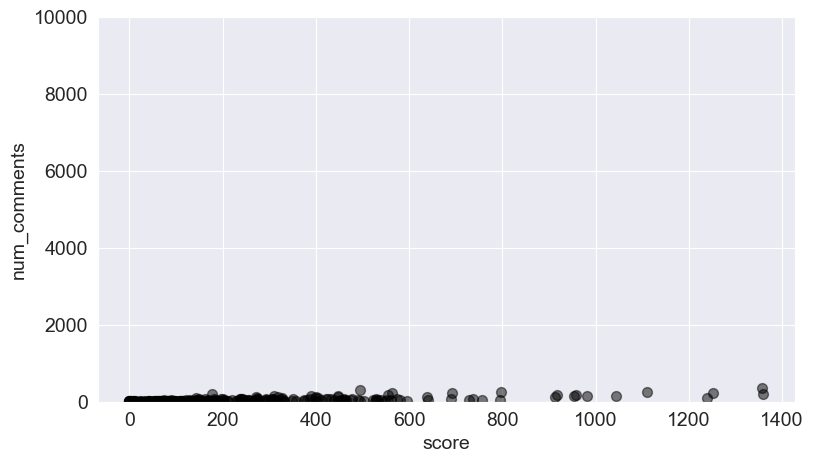

In [178]:
ax=health_reddit.plot.scatter(x='score', y='num_comments',s=50,c='k',alpha=.5)
ax.set_ylim((0, 170000))
ax.set_ylim((0,10000))

##### Additional steps

Adding a percentage to the comment and scores

#### Explanation
Steps to prepare data:
Steps to clean data:
Steps in creating additional columns:

### Step 3 - Exploratory Data analysis


In [ ]:
Calculating the sum of num_comments, score, num_crossposts, upvote_ratio

In [7]:
import pandas as pd

df = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

total_sum = df['num_comments'].sum()
print("Sum of num_comments is", total_sum)

total_counts = df['score'].sum()
print("Sum of score is", total_counts)


Sum of num_comments is 10732
Sum of score is 73450


In [ ]:
Calculating the means of num_comments, score, num_crossposts, upvote_ratio

In [9]:
data = pd.read_csv('health_reddit_data_with_dates_arrow.csv')
mean_comments = data['num_comments'].mean()
print("Mean num_comments is", mean_comments)

mean_score = data['score'].mean()
print("Mean score is", mean_score)

mean_crossposts = data['num_crossposts'].mean()
print("Mean num_crossposts is", mean_crossposts)

upvote_ratio = data['upvote_ratio'].mean()
print("Mean upvote_ratio is", upvote_ratio)

Mean num_comments is 25.67464114832536
Mean score is 175.7177033492823
Mean num_crossposts is 0.16028708133971292
Mean upvote_ratio is 0.9202392344497606


In [85]:
Calculating the range of num_comments, score, num_crossposts, upvote_ratio

In [132]:
range_comments = data['num_comments'].max() - data['num_comments'].min()
print("Range num_comments is", range_comments)

range_score = data['score'].max() - data['score'].min()
print("Range score is", range_score)

range_crossposts = data['num_crossposts'].max() - data['num_crossposts'].min()
print("Range num_crossposts is", range_crossposts)

range_upvote_ratio = data['upvote_ratio'].max() - data['upvote_ratio'].min()
print("Range upvote_ratio is",range_upvote_ratio)

Range num_comments is 344
Range score is 1360
Range num_crossposts is 3
Range upvote_ratio is 0.8200000000000001


In [11]:
standard_deviation_comments = data["num_comments"].std()
print(standard_deviation_comments)

standard_deviation_score = data["score"].std()
print(standard_deviation_score)

standard_deviation_num_crossposts = data['num_crossposts'].std()
print(standard_deviation_num_crossposts)

standard_deviation_upvote_ratio = data['upvote_ratio'].std()
print(standard_deviation_score)

47.50261260507008
228.31327445541692
0.42199925429326895
228.31327445541692


<function matplotlib.pyplot.show(close=None, block=None)>

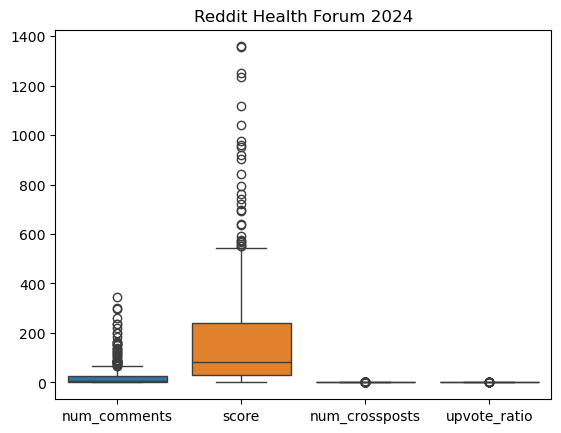

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=data[['num_comments', 'score', 'num_crossposts', 'upvote_ratio']])
plt.title('Reddit Health Forum 2024')
plt.show


In [ ]:
new

In [1]:
mn

NameError: name 'mn' is not defined

#### Additional step

###### Adding an index to the data set

In [161]:
standard_deviation_comments = data["num_comments"].std()
print(standard_deviation_comments)

standard_deviation_score = data["score"].std()
print(standard_deviation_score)

standard_deviation_num_crossposts = data['num_crossposts'].std()
print(standard_deviation_num_crossposts)

standard_deviation_upvote_ratio = data['upvote_ratio'].std()
print(standard_deviation_score)

46.52290873104731
228.03539160198306
0.42199925429326895
228.03539160198306
